# 🎰 The Multi-Armed Bandit Problem with OpenAI Gym

Welcome to this interactive notebook where we delve into the fascinating world of the Multi-Armed Bandit (MAB) problem—a cornerstone in reinforcement learning that exemplifies the exploration-exploitation dilemma.

---

## 🎯 Objectives

In this notebook, we aim to:

- **Understand the OpenAI Gym Environment**  
  Learn how to set up and interact with environments tailored for reinforcement learning tasks.

- **Implement Key Algorithms**:
  - **Epsilon-Greedy**: A strategy that balances exploration and exploitation by choosing random actions with a fixed probability.
  - **Upper Confidence Bound (UCB1)**: An approach that selects actions based on optimism in the face of uncertainty.
  - **Thompson Sampling**: A Bayesian method that selects actions according to their probability of being optimal.

- **Compare Epsilon-Greedy and UCB1**  
  Analyze the performance and trade-offs between these two strategies to understand their practical applications better.

- **Simulate Slot Machine Scenarios**  
  Apply these algorithms to simulated slot machines (bandits) to identify the most rewarding options.

---

Let's embark on this journey to master the art of decision-making under uncertainty!



line.png

# Challenge Understanding
The Multi-Armed Bandit (MAB) problem is a fundamental concept in reinforcement learning that encapsulates the core challenge of making optimal decisions under uncertainty. It is often introduced using the analogy of slot machines—also known as "one-armed bandits"—commonly found in casinos.

Imagine you're standing in front of several slot machines, each with a lever (or "arm") that, when pulled, gives you a reward. However, each machine has its own unknown reward distribution, meaning some machines may give high rewards frequently, while others might yield low or infrequent rewards.
Your task is to maximize the total reward over time by choosing which machine to play, and how often.

---

## 🧠 One-Armed vs. Multi-Armed Bandits

- A **one-armed bandit** refers to a single slot machine.  
- When there are multiple such machines to choose from, the setup is called a **multi-armed bandit** (or **k-armed bandit**), where \( k \) represents the number of available arms (slot machines).
Multi-armed bandits are shown below:

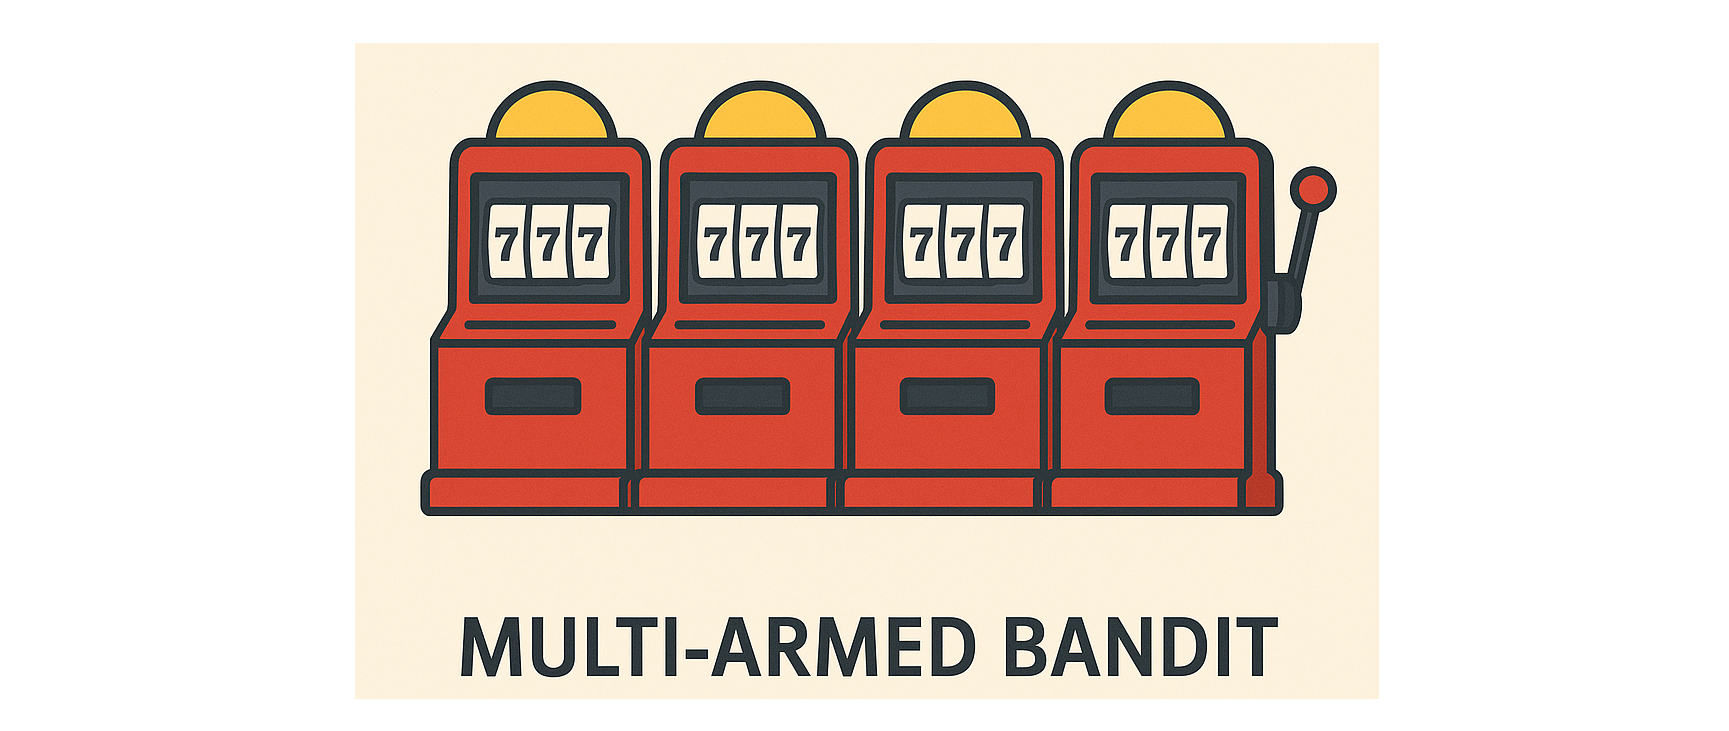

## ⚙️ Problem Setup
- **Arms (Actions):**
Each slot machine represents an arm. Pulling an arm corresponds to taking an action, which yields a reward drawn from a probability distribution specific to that arm.

- **Objective:**
The goal is to maximize the cumulative reward over time by strategically selecting which arms to pull at each time step.

## 📊 Value of an Arm ( Q(a) )
The expected reward of an arm ( a ) is estimated as the average of all rewards received from that arm over past trials.

Formal Equation:

$$
Q(a) = \frac{\text{Total rewards received from arm } a}{\text{Number of times arm } a \text{ was pulled}}
$$

### 🔍 Formal Definition:

$$
Q_t(a) = \frac{\sum_{j=1}^{t} \mathbf{1}\{A_j = a\} \cdot R_j}{\sum_{j=1}^{t} \mathbf{1}\{A_j = a\}}
$$

where:
- \( R_j \) is the reward received at time step \( j \)
- \( \mathbf{1}\{A_j = a\} \) is an indicator function that is 1 if arm \( a \) was selected at time \( j \), and 0 otherwise

---



## 🎯 Goal and Challenges

At each time step \( t \), the agent selects an arm and receives a reward. The ultimate goal is to:

- **Identify the optimal arm** (i.e., the one with the highest expected reward)  
- **Maximize cumulative reward** over a series of decisions
- **Minimize regret** (the cost of not knowing the best arm from the start)

However, the agent starts with no prior knowledge about the reward distributions of each arm. Hence, it must carefully balance two strategies: **Exploration** and **Exploitation**.

---

## 🔁 The Exploration-Exploitation Dilemma

- **Exploration:** Trying different arms to discover their reward potential  
- **Exploitation:** Choosing the arm that has yielded the highest reward so far

This trade-off is known as the **exploration-exploitation dilemma** — a central challenge in reinforcement learning.
Balancing these strategies is critical to performing well in the long run.

line.png

# 💻 Getting Started with Code

We now move from theory to implementation. In this section, we will:

- Set up the Multi-Armed Bandit environment using OpenAI Gym.

- Explore the basic mechanics of interacting with the environment.

- Prepare the foundation for applying algorithms like Epsilon-Greedy and UCB.

## 🔹 Step 1: Install and Import Required Libraries

We begin by installing the necessary packages and importing the libraries used throughout this notebook.


In [ ]:
# Install the required packages
!pip install gym > /dev/null 2>&1
!git clone https://github.com/JKCooper2/gym-bandits.git > /dev/null 2>&1
!pip install ./gym-bandits/. > /dev/null 2>&1

In [ ]:
# Downgrade numpy to a compatible version
!pip install numpy==1.23.5 --quiet

In [ ]:
# Import core libraries
import gym
import gym_bandits
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure plot style
sns.set(style="whitegrid")


##🔹 Step 2: Initialize the Bandit Environment

We'll use the **BanditTenArmedGaussian-v0** environment provided by **gym-bandits**. This simulates a 10-armed slot machine, where each arm has a different (but fixed) reward distribution.

In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Create the 10-armed bandit environment
env = gym.make('BanditTenArmedGaussian-v0')
env.seed(42)  # Ensures same rewards across runs


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/core.py:256: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


[42]

🔍 What is this Environment?

The **BanditTenArmedGaussian-v0** environment simulates 10 slot machines (arms). Each time you pull an arm (i.e., choose an action), it returns a reward sampled from a normal distribution centered around that arm’s mean value. Your job is to figure out, over time, which arm is the most rewarding.

## 🔹 Step 3: Sample and Explore the Environment
Let’s run a few random episodes to understand how to interact with the environment. This helps us get a feel of the action and reward structure.

In [ ]:
# Reset environment (though not strictly needed in stateless bandits)
observation = env.reset()

# Try 5 random actions and observe the rewards
for i in range(5):
    print(f"\n🎲 Episode {i + 1}")

    # Randomly select one of the 10 arms
    action = env.action_space.sample()
    print("Selected Arm:", action)

    # Take action and receive reward
    observation, reward, done, info = env.step(action)
    print("Received Reward:", reward)



🎲 Episode 1
Selected Arm: 4
Received Reward: -0.8055335404774775

🎲 Episode 2
Selected Arm: 8
Received Reward: -1.393557223682057

🎲 Episode 3
Selected Arm: 6
Received Reward: 2.3956578964587187

🎲 Episode 4
Selected Arm: 2
Received Reward: -0.8761874595151684

🎲 Episode 5
Selected Arm: 6
Received Reward: 0.8758690137999842


/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:190: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `return_info` to return information from the environment resetting.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/usr/local/lib/python3.11/dist-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the envir

## 🔹 Step 4: Inspect the True Reward Distributions of All Arms
Although we don’t normally have access to the "true" values during real training, for analysis and learning purposes, we can peek into the environment's internal parameters to see the expected mean reward for each arm.

In [ ]:
# Access true mean values of each arm from internal r_dist
true_action_values = [mu for mu, sigma in env.unwrapped.r_dist]

# Print them
print("🎯 True Mean Rewards for Each Arm:")
for i, val in enumerate(true_action_values):
    print(f"Arm {i}: Mean Reward = {val:.3f}")


🎯 True Mean Rewards for Each Arm:
Arm 0: Mean Reward = 0.497
Arm 1: Mean Reward = -0.138
Arm 2: Mean Reward = 0.648
Arm 3: Mean Reward = 1.523
Arm 4: Mean Reward = -0.234
Arm 5: Mean Reward = -0.234
Arm 6: Mean Reward = 1.579
Arm 7: Mean Reward = 0.767
Arm 8: Mean Reward = -0.469
Arm 9: Mean Reward = 0.543


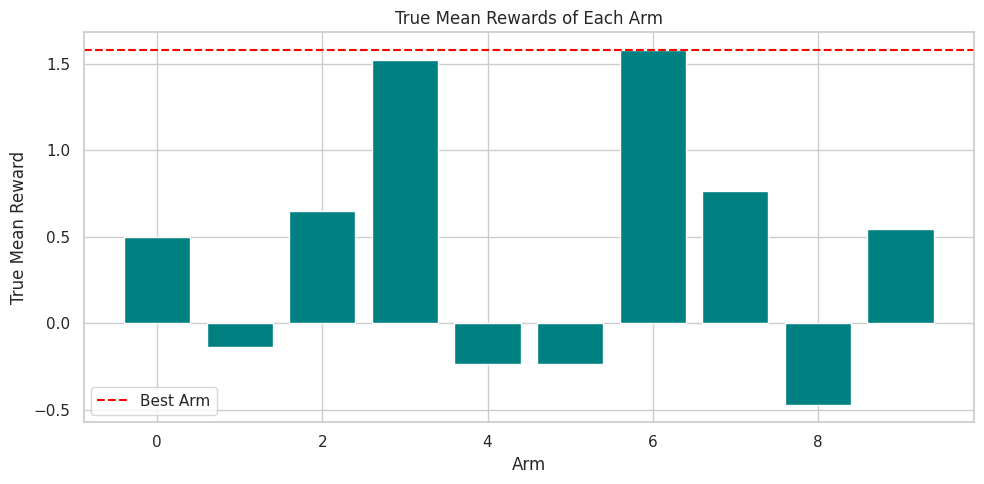

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(range(len(true_action_values)), true_action_values, color='teal')
plt.axhline(y=max(true_action_values), color='red', linestyle='--', label='Best Arm')
plt.title("True Mean Rewards of Each Arm")
plt.xlabel("Arm")
plt.ylabel("True Mean Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 🔹 Step 5: Visualize the Underlying Reward Distributions (PDFs)

In a real-world scenario, we do not know the exact reward distribution of each arm. But since this is a **controlled simulated environment**, we can *peek under the hood* and inspect the true nature of each arm’s reward behavior.

In the `BanditTenArmedGaussian-v0` environment, each arm is associated with a **normal distribution**:

$$
\text{Reward} \sim \mathcal{N}(\mu_i, \sigma^2)
$$

where:
- $ \mu_i $: Mean reward of arm \( i \), randomly sampled during initialization
- $ \sigma = 1 $: Fixed standard deviation across all arms

---

We will now visualize the **probability density functions (PDFs)** for the rewards from each arm.  
This gives us an intuitive understanding of:

- How spread out each arm's rewards are  
- Which arms are more likely to give high payouts

---

### 📈 Gaussian PDFs of Arm Rewards
We'll plot these below using `matplotlib` and `scipy.stats.norm`.

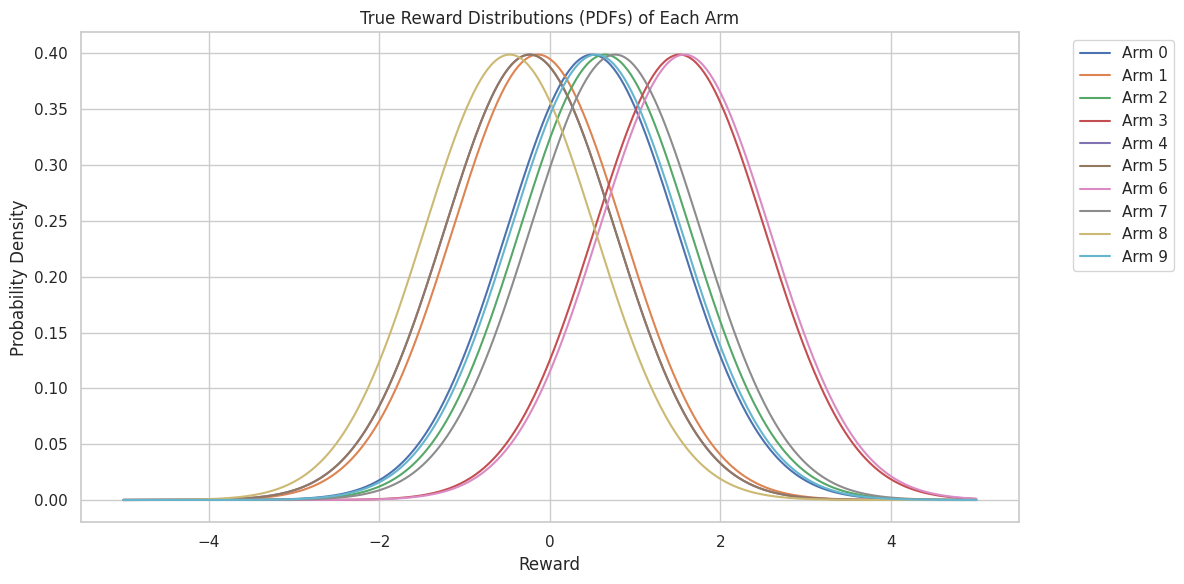

In [ ]:
from scipy.stats import norm

# Get true means and standard deviations from the environment
true_means = [mu for mu, sigma in env.unwrapped.r_dist]
true_stds = [sigma for mu, sigma in env.unwrapped.r_dist]

# Create x-values to plot the normal distributions
x = np.linspace(-5, 5, 500)

# Plot the PDF for each arm
plt.figure(figsize=(12, 6))
for i in range(len(true_means)):
    y = norm.pdf(x, loc=true_means[i], scale=true_stds[i])
    plt.plot(x, y, label=f"Arm {i}")

plt.title("True Reward Distributions (PDFs) of Each Arm")
plt.xlabel("Reward")
plt.ylabel("Probability Density")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


🧠 What Are We Seeing?
- Each curve represents one arm’s reward distribution.

- The center (mean) of the curve indicates the average reward that arm gives.

- The width (standard deviation) shows how much the reward varies.

- The arm with the highest peak mean is the most promising one, but this is not always apparent in early exploration.

- This visualization helps us build intuition before implementing strategies like Epsilon-Greedy or UCB that aim to find and exploit the best arm over time.

# 🧪 Implementing Action Selection Strategies

Now that we’ve explored the environment and visualized the reward distributions, it’s time to **design intelligent strategies** for decision-making.

In reinforcement learning, one of the key challenges is to **balance exploration and exploitation**:

- 🧭 **Exploration**: Trying out new actions to gather more information.
- 💰 **Exploitation**: Leveraging known information to maximize immediate reward.

In this section, we’ll start implementing various action selection strategies to solve the Multi-Armed Bandit problem.


## 📌 4.1 Epsilon-Greedy Method

---



### 🧠 Theory

#### 📘 What is the Epsilon-Greedy Strategy?

The **Epsilon-Greedy** strategy is one of the simplest and most widely used exploration techniques. It works as follows:

- With probability **ε (epsilon)**, select a random arm (**exploration**).
- With probability **1 - ε**, select the arm with the **highest estimated reward** (**exploitation**).

This ensures the agent continues exploring while still exploiting what it has learned.

---

#### 📐 Epsilon-Greedy Formula

$$
\text{Action} =
\begin{cases}
\text{random arm} & \text{with probability } \varepsilon \\
\arg\max_a Q(a) & \text{with probability } 1 - \varepsilon
\end{cases}
$$

- Q-values are updated incrementally as:

$$
Q_{n+1}(a) = Q_n(a) + \frac{1}{N(a)}(R - Q_n(a))
$$

where:
- $ Q_n(a) $: current estimate of the action value
- $ R $: observed reward
- $ N(a) $: number of times action \( a \) was chosen
---

### ⚙️ Implementation

In [ ]:
# Reset environment and seed
env.seed(42)
np.random.seed(42)

# Define number of bandits (arms)
number_of_bandits = env.action_space.n

# Initialize Q-table: estimated reward for each arm
q_table = np.zeros(number_of_bandits)

# Initialize N-table: how many times each arm has been pulled (start with 1 to avoid divide-by-zero)
n_table = np.ones(number_of_bandits)

# Set the exploration rate (epsilon)
epsilon = 0.1

# Number of episodes (pulls)
num_episodes = 1000

# Store rewards for plotting
rewards = []

# Epsilon-Greedy algorithm
for episode in range(num_episodes):

    # Exploration vs Exploitation
    if np.random.rand() > epsilon:
        action = np.argmax(q_table)  # Exploit
    else:
        action = np.random.randint(number_of_bandits)  # Explore

    # Take action in the environment and observe reward
    _, reward, _, _ = env.step(action)
    rewards.append(reward)

    # Update Q-table using incremental formula
    q_table[action] += (reward - q_table[action]) / n_table[action]

    # Update the count for the selected arm
    n_table[action] += 1


In [ ]:
def epsilon_greedy(env, epsilon, steps, seed=42):
    """
    Runs the epsilon-greedy strategy on a given environment.

    Parameters:
    - env: The bandit environment (from gym)
    - epsilon: Probability of choosing a random action (exploration)
    - steps: Number of action selections (episodes)
    - seed: Random seed for reproducibility

    Returns:
    - rewards: List of rewards collected over time
    - q_values: Final Q-value estimates for each arm
    """

    # Set seeds for reproducibility
    env.seed(seed)
    np.random.seed(seed)

    # Number of available arms (actions)
    number_of_arms = env.action_space.n

    # Initialize Q-values: estimated mean reward for each arm
    q_values = np.zeros(number_of_arms)

    # Initialize N-table: count of how many times each arm has been selected
    # start with 1 to avoid division by zero
    n_values = np.ones(number_of_arms)  # start with 1 to avoid division by zero

    # Store rewards collected during the process
    rewards = []

    # Main loop: simulate 'steps' number of arm pulls
    for s in range(steps):
        # Exploration vs Exploitation

        # Generate a random number between 0 and 1
        random_number = np.random.random()

        # ε-greedy action selection
        if np.random.rand() > epsilon:
            # Exploit: choose best-known arm
            action = np.argmax(q_values)  # Exploit: choose best-known arm
        else:
            # Explore: choose random arm
            action = np.random.randint(number_of_arms)

        # Take the action and receive reward
        observation, reward, done, info = env.step(action)
        rewards.append(reward)

        # InUpdate Q-value (of selected action) using incremental formula
        q_values[action] += (reward - q_values[action]) / n_values[action]

        # Increment the count for the selected arm
        n_values[action] += 1

    return rewards, q_values


### ✅ Run Epsilon-Greedy with a Fixed Epsilon

If you just want to run the algorithm with a single $ε$ (e.g., $ε = 0.1$) and analyze the output:



In [ ]:
# Define the environment
env = gym.make("BanditTenArmedGaussian-v0")
env.reset()

# Run the algorithm with fixed epsilon
epsilon = 0.1
steps = 1000
rewards, q_values = epsilon_greedy(env, epsilon = epsilon, steps=steps)

In [ ]:
# Show the estimated Q-values
print("Estimated Q-values for each arm:")
for i, q in enumerate(q_values):
    print(f"Arm {i}: Q = {q:.3f}")

Estimated Q-values for each arm:
Arm 0: Q = -2.247
Arm 1: Q = 0.119
Arm 2: Q = 0.744
Arm 3: Q = 2.620
Arm 4: Q = 0.109
Arm 5: Q = 0.024
Arm 6: Q = -0.427
Arm 7: Q = -1.031
Arm 8: Q = 0.405
Arm 9: Q = 0.258


In [ ]:
# Display the best estimated arm
best_bandit = np.argmax(q_values)
print(f"🏆 Best estimated bandit: Arm {best_bandit}")

🏆 Best estimated bandit: Arm 3


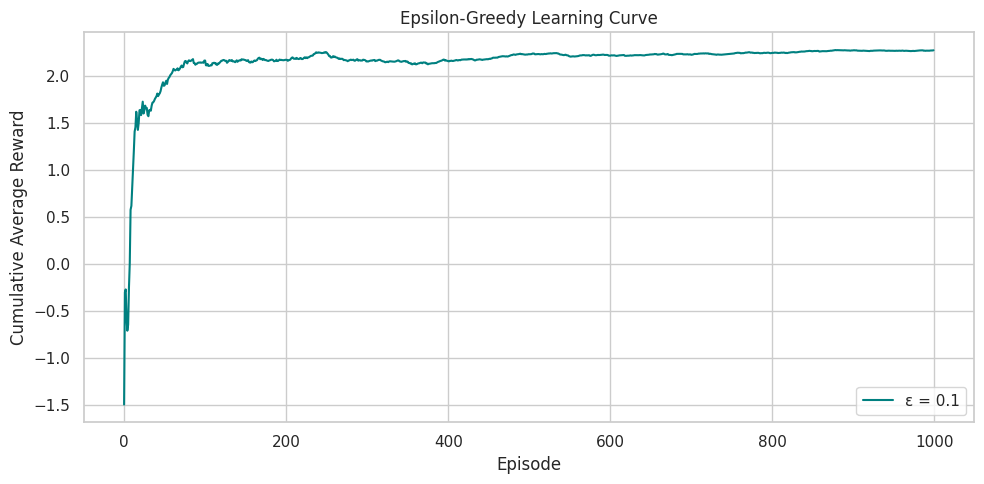

In [ ]:
# Cumulative average reward to visualize learning
cumulative_avg_reward = np.cumsum(rewards) / (np.arange(num_episodes) + 1)

plt.figure(figsize=(10, 5))
plt.plot(cumulative_avg_reward, color='teal', label=f"ε = {epsilon}")
plt.xlabel("Episode")
plt.ylabel("Cumulative Average Reward")
plt.title("Epsilon-Greedy Learning Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---

### 📊 Compare Multiple Epsilons Using Cumulative Average Rewards

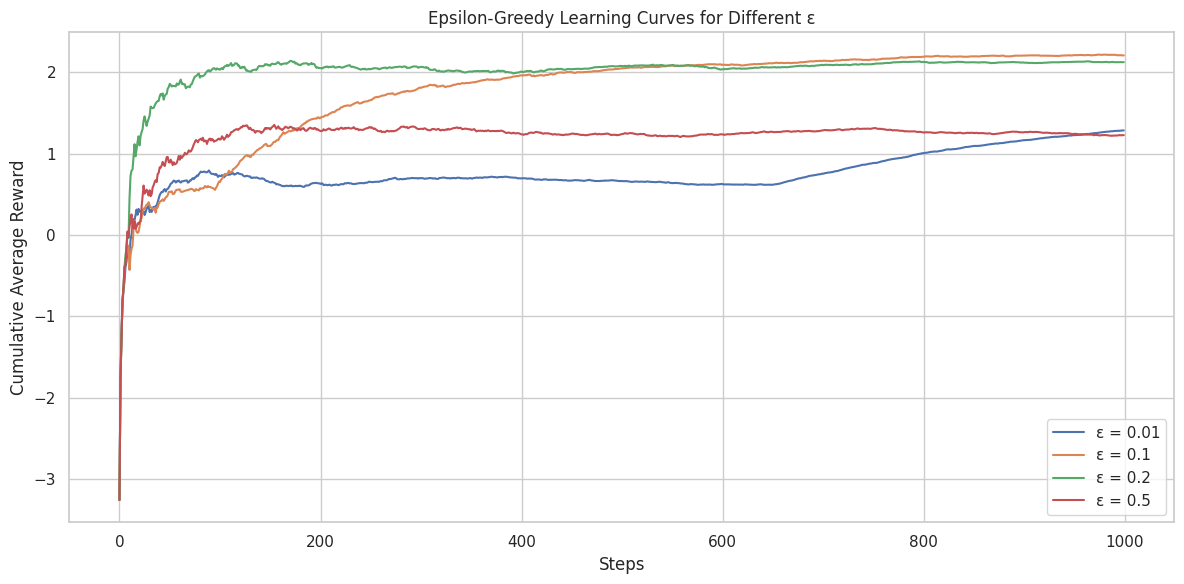

In [ ]:
# Compare cumulative average reward curves for different epsilons
epsilons = [0.01, 0.1, 0.2, 0.5]
steps = 1000

plt.figure(figsize=(12, 6))

for epsilon in epsilons:
    env.reset()
    rewards, _ = epsilon_greedy(env, epsilon=epsilon, steps=steps)
    cumulative_avg_reward = np.cumsum(rewards) / (np.arange(steps) + 1)
    plt.plot(cumulative_avg_reward, label=f"ε = {epsilon}")

plt.title("Epsilon-Greedy Learning Curves for Different ε")
plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

line.png

## 📌 4.2 Upper Confidence Bound (UCB1)

---


### 🧠 Theory

#### What is UCB?

The **Upper Confidence Bound (UCB1)** algorithm is a deterministic strategy that chooses actions based on *optimism in the face of uncertainty*. It strikes a balance between:

- **Exploitation**: Choosing the arm that currently has the highest estimated reward.
- **Exploration**: Trying out arms that haven’t been pulled often, because they might be better than they seem.

UCB1 selects the arm \( a \) that maximizes:

$$
Q(a) + \sqrt{\frac{2 \log t}{N(a)}}
$$

Where:

- $ Q(a) $: Estimated mean reward of arm $a$
- $ t $: Current time step
- $ N(a) $: Number of times arm $a$ has been selected

🧩 The **square root term** is the *exploration bonus*. It is large for rarely chosen arms and gradually shrinks as an arm is selected more often.

As a result, UCB1 starts by exploring all arms and eventually focuses more on those with high rewards, but still occasionally checks others to avoid missing out.

---

line.png

### ⚙️ Implementation

In [ ]:
def ucb1(env, steps, seed=42):
    """
    Runs the Upper Confidence Bound (UCB1) strategy on a given environment.

    Parameters:
    - env: The bandit environment (from gym)
    - steps: Number of action selections (episodes)
    - seed: Random seed for reproducibility

    Returns:
    - rewards: List of rewards collected over time
    - q_values: Final Q-value estimates for each arm
    """
    env.seed(seed)
    np.random.seed(seed)

    n_arms = env.action_space.n
    q_values = np.zeros(n_arms)
    counts = np.zeros(n_arms)
    rewards = []

    for t in range(steps):
        if t < n_arms:
            action = t  # Initialize: pull each arm once
        else:
            ucb_values = q_values + np.sqrt(2 * np.log(t + 1) / (counts + 1e-5))
            action = np.argmax(ucb_values)

        _, reward, _, _ = env.step(action)
        rewards.append(reward)

        counts[action] += 1
        q_values[action] += (reward - q_values[action]) / counts[action]

    return rewards, q_values


---

### 📊 Visualizing UCB1 Performance

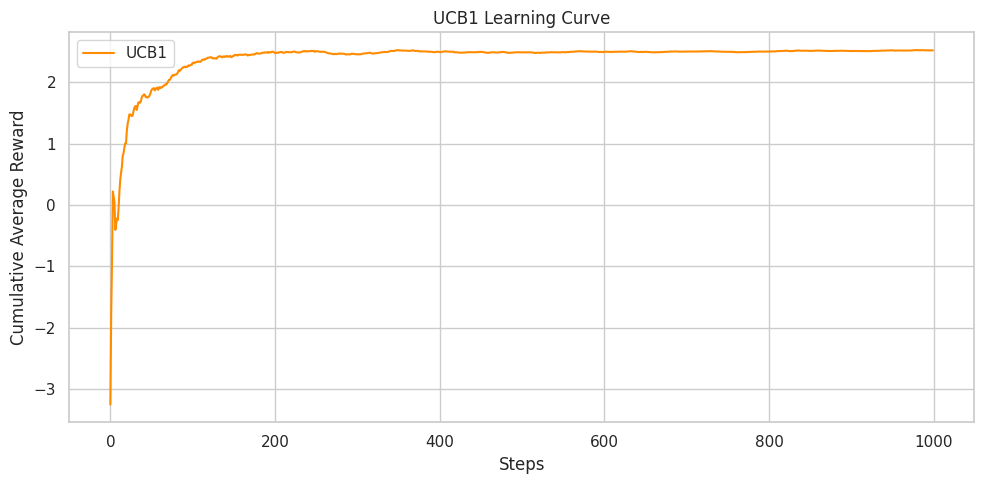

In [ ]:
### 📊 Visualizing UCB1 Performance

# Number of steps to simulate
steps = 1000

# Reset the environment before running the strategy
env.reset()

# Run UCB1 and collect rewards
ucb_rewards, ucb_q_values = ucb1(env, steps)

# Calculate cumulative average reward
cumulative_avg_ucb = np.cumsum(ucb_rewards) / (np.arange(steps) + 1)

# Plotting the learning curve
plt.figure(figsize=(10, 5))
plt.plot(cumulative_avg_ucb, color='darkorange', label="UCB1")
plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.title("UCB1 Learning Curve")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Display the best estimated arm from UCB
best_ucb_arm = np.argmax(ucb_q_values)
print(f"🏆 Best estimated bandit by UCB1: Arm {best_ucb_arm}")

🏆 Best estimated bandit by UCB1: Arm 3


line.png

## 4.3 Comparing Epsilon-Greedy and UCB1

In this section, we'll evaluate how well Epsilon-Greedy and UCB1 perform on the same bandit environment. We’ll use cumulative average reward plots to visualize their learning behavior over time.

---
### ⚙️ Implementation


🔧 **Setup: Create a Fresh Environment**

In [ ]:
# Create a new instance of the environment
env_egreedy = gym.make('BanditTenArmedGaussian-v0')
env_ucb = gym.make('BanditTenArmedGaussian-v0')

# Set the same seed so both algorithms see the same arm distributions
env_egreedy.seed(42)
env_ucb.seed(42)
np.random.seed(42)

# Reset environments
env_egreedy.reset()
env_ucb.reset()


0

🚀 **Run Both Algorithms**

In [ ]:
# Run Epsilon-Greedy
rewards_egreedy, q_values_egreedy = epsilon_greedy(env_egreedy, epsilon=0.1, steps=1000)

# Run UCB1
rewards_ucb, q_values_ucb = ucb1(env_ucb, steps=1000)


📈 **Visualize Cumulative Average Reward**

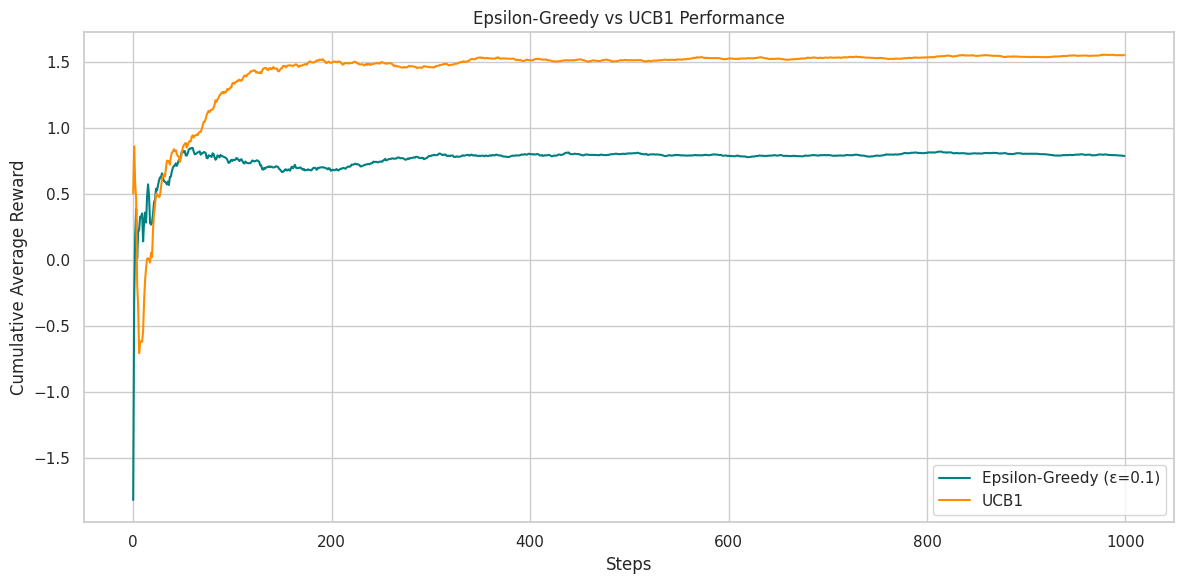

In [ ]:
# Calculate cumulative average rewards
cumulative_avg_egreedy = np.cumsum(rewards_egreedy) / (np.arange(len(rewards_egreedy)) + 1)
cumulative_avg_ucb = np.cumsum(rewards_ucb) / (np.arange(len(rewards_ucb)) + 1)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(cumulative_avg_egreedy, label="Epsilon-Greedy (ε=0.1)", color="teal")
plt.plot(cumulative_avg_ucb, label="UCB1", color="darkorange")
plt.xlabel("Steps")
plt.ylabel("Cumulative Average Reward")
plt.title("Epsilon-Greedy vs UCB1 Performance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### 🧠 Interpretation

- Epsilon-Greedy balances exploration and exploitation using a fixed probability. It might take longer to converge but performs reliably when tuned.

- UCB1 adds an optimistic boost to rarely visited arms, accelerating early exploration and quickly exploiting the best arm.

- The algorithm that yields faster convergence to high rewards typically performs better in such settings

line.png

## 📌 4.3 Thompson Sampling

Thompson Sampling is a powerful Bayesian approach for solving the Multi-Armed Bandit problem. Instead of estimating a single value (like mean reward) for each arm, it maintains a full probability distribution over possible success rates, which naturally reflects both:

- What we believe about an arm’s performance

- How confident we are in that belief

At each step:

- We sample one possible success rate from each arm’s distribution

- Choose the arm with the highest sampled value

- Update our beliefs (posterior) based on the reward

---

### 🎯 Why Beta Distribution?
- Each arm's success is modeled as a Bernoulli trial (reward = 0 or 1).

- The Beta distribution is the conjugate prior for the Bernoulli distribution.

- This allows us to maintain and update beliefs about success rates in a simple, elegant way.

---

### 📐 Thompson Sampling Algorithm

At each time step:

1. For each arm \( i \), sample a probability from the Beta distribution:

   $$
   \theta_i \sim \text{Beta}(\alpha_i, \beta_i)
   $$

2. Select the arm with the highest \( \theta_i \)

3. Receive a reward \( r \in \{0, 1\} \)

4. Update the Beta distribution parameters for the selected arm:

  $$
   \alpha_i \leftarrow \alpha_i + \text{reward}
  $$
  $$
   \beta_i \leftarrow \beta_i + (1 - \text{reward})
  $$
---

### 🎯 Implemention

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import imageio
import io
import cv2

In [ ]:
# -------------------------------
# Step 1: Simulation Setup
# -------------------------------

# True (hidden) success probabilities for each arm
true_probs = [0.1, 0.7, 0.5]
n_arms = len(true_probs)

# Number of trials
n_trials = 200


# -------------------------------
# Step 2: Initialize Beliefs
# -------------------------------

# Alpha and Beta parameters for each arm's Beta distribution (prior = Beta(1,1))
alphas = np.ones(n_arms)
betas = np.ones(n_arms)


# -------------------------------
# Step 3: Tracking Variables
# -------------------------------

# Track rewards and selected arms
all_rewards = np.zeros(n_trials)
chosen_arms = np.zeros(n_trials, dtype=int)


# -------------------------------
# Step 4: GIF Plotting Utility
# -------------------------------

# Convert Matplotlib figures to image arrays (for GIF creation)
def fig_to_image_array(fig, dpi=100):
    buf = io.BytesIO()
    fig.savefig(buf, format='png', dpi=dpi)
    buf.seek(0)
    img_arr = np.frombuffer(buf.getvalue(), dtype=np.uint8)
    buf.close()
    img = cv2.imdecode(img_arr, 1)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Initialize list to store frames
gif_frames = []

# Prepare x-axis for plotting Beta PDFs
x = np.linspace(0, 1, 200)


# -------------------------------
# Step 5: Thompson Sampling Loop
# -------------------------------

for t in range(n_trials):
    # Step 5a: Sample one value from each arm's Beta distribution
    sampled_thetas = np.random.beta(alphas, betas)

    # Step 5b: Select the arm with the highest sampled probability
    selected_arm = np.argmax(sampled_thetas)
    chosen_arms[t] = selected_arm

    # Step 5c: Simulate pulling the selected arm and receive reward (0 or 1)
    reward = 1 if np.random.uniform() < true_probs[selected_arm] else 0
    all_rewards[t] = reward

    # Step 5d: Update Beta distribution parameters for selected arm
    alphas[selected_arm] += reward       # success
    betas[selected_arm] += (1 - reward)  # failure

    # Step 5e: Plot current Beta distributions
    fig, ax = plt.subplots(figsize=(8, 5))
    for i in range(n_arms):
        y = beta.pdf(x, alphas[i], betas[i])
        ax.plot(x, y, label=f'Arm {i} (True p={true_probs[i]})')
    ax.set_title(f'Trial {t + 1} - Thompson Sampling')
    ax.set_xlabel("Success Probability")
    ax.set_ylabel("Density")
    ax.set_ylim(0, 12)
    ax.legend()
    ax.grid(True)

    # Save frame to GIF list
    gif_frames.append(fig_to_image_array(fig))
    plt.close(fig)

✅ GIF saved as 'thompson_sampling_evolution.gif'


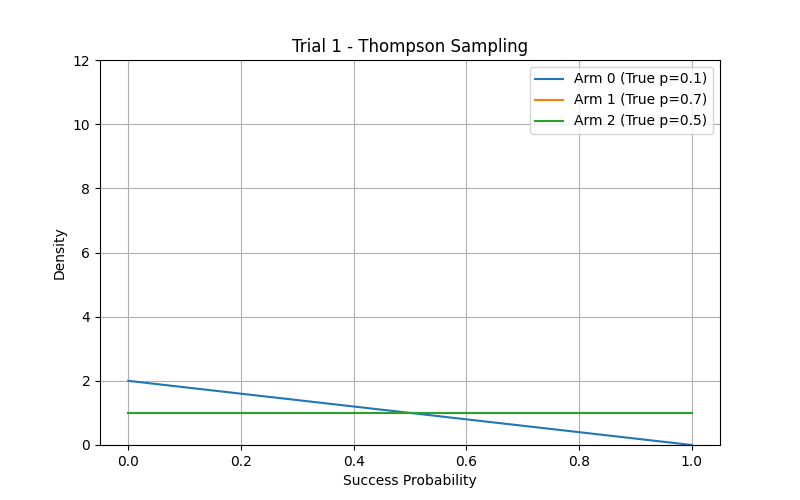

In [ ]:
# -------------------------------
# Step 6: Save and Display GIF
# -------------------------------

# Save the animation as a GIF file
imageio.mimsave("thompson_sampling_evolution.gif", gif_frames, duration=0.1)
print("✅ GIF saved as 'thompson_sampling_evolution.gif'")

In [ ]:
# Display GIF in Jupyter/Colab (optional)
from IPython.display import Image
Image(filename="thompson_sampling_evolution.gif")

📈 Final Visualization

In [ ]:
# -------------------------------
# Step 7: Results and Visualizations
# -------------------------------

# Compute posterior mean (estimated success probability for each arm)
estimated_probs = alphas / (alphas + betas)

# Print estimated and true success probabilities
print("\nEstimated success probabilities (posterior means):")
for i in range(n_arms):
    print(f"Arm {i}: Estimated = {estimated_probs[i]:.3f}, True = {true_probs[i]}")



In [ ]:
# Plot 1: Number of times each arm was selected
plt.figure(figsize=(8, 4))
plt.hist(chosen_arms, bins=np.arange(n_arms + 1) - 0.5, edgecolor='black', rwidth=0.8)
plt.xticks(range(n_arms))
plt.xlabel("Arm")
plt.ylabel("Number of Times Selected")
plt.title("Arm Selections Using Thompson Sampling")
plt.grid(True)
plt.show()


In [ ]:
# Plot 2: Estimated vs. True Success Probabilities
plt.figure(figsize=(8, 4))
bar_width = 0.35
index = np.arange(n_arms)
plt.bar(index, true_probs, bar_width, label='True Probabilities', alpha=0.6)
plt.bar(index + bar_width, estimated_probs, bar_width, label='Estimated Probabilities', alpha=0.8)
plt.xlabel("Arm")
plt.ylabel("Success Probability")
plt.title("True vs Estimated Probabilities")
plt.xticks(index + bar_width / 2, [f"Arm {i}" for i in range(n_arms)])
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Plot 3: Cumulative Average Reward
cumulative_avg_reward = np.cumsum(all_rewards) / (np.arange(n_trials) + 1)
plt.figure(figsize=(8, 4))
plt.plot(cumulative_avg_reward, color='teal')
plt.axhline(y=max(true_probs), color='gray', linestyle='--', label='Best Possible')
plt.xlabel("Trial")
plt.ylabel("Cumulative Average Reward")
plt.title("Learning Curve of Thompson Sampling")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()